In [1]:


import copy
%matplotlib inline

import numpy as np
from hogben.optimise import Optimiser
from hogben.simulate import SimulateReflectivity
from hogben.utils import Fisher
from refnx.reflect import SLD
from hogben.models.samples import Sample, MagneticLayer
import matplotlib.pyplot as plt

import refnx



In [2]:
def refnx_sample():
    """Define a bilayer sample, and return the associated refnx model"""
    # Define sample
    air = SLD(0, name='Air')
    layer1 = SLD(-1.2, name='Layer 1')(thick=40, rough=1)        
    layer2 = SLD(6.2, name='Layer 2')(thick=65, rough=1)    
    underlayer = MagneticLayer(nSLD = 4, mSLD=3, thick=40, rough=1, underlayer=True)
    substrate = SLD(2, name='Substrate')(thick=0, rough=0)
    
    layer1.thick.bounds = (80, 120)
    layer1.rough.bounds = (3, 7)
    layer2.thick.bounds = (40, 70)
    layer2.rough.bounds = (3, 7)
    

    params = [
        layer1.thick,
        layer1.rough,
        layer2.thick,
        layer2.rough,        
    ]
    for param in params:
        param.vary = True

    sample = air  | layer2 | layer1 | underlayer | substrate
    return sample

sample = Sample(refnx_sample(), bkg=1e-9)

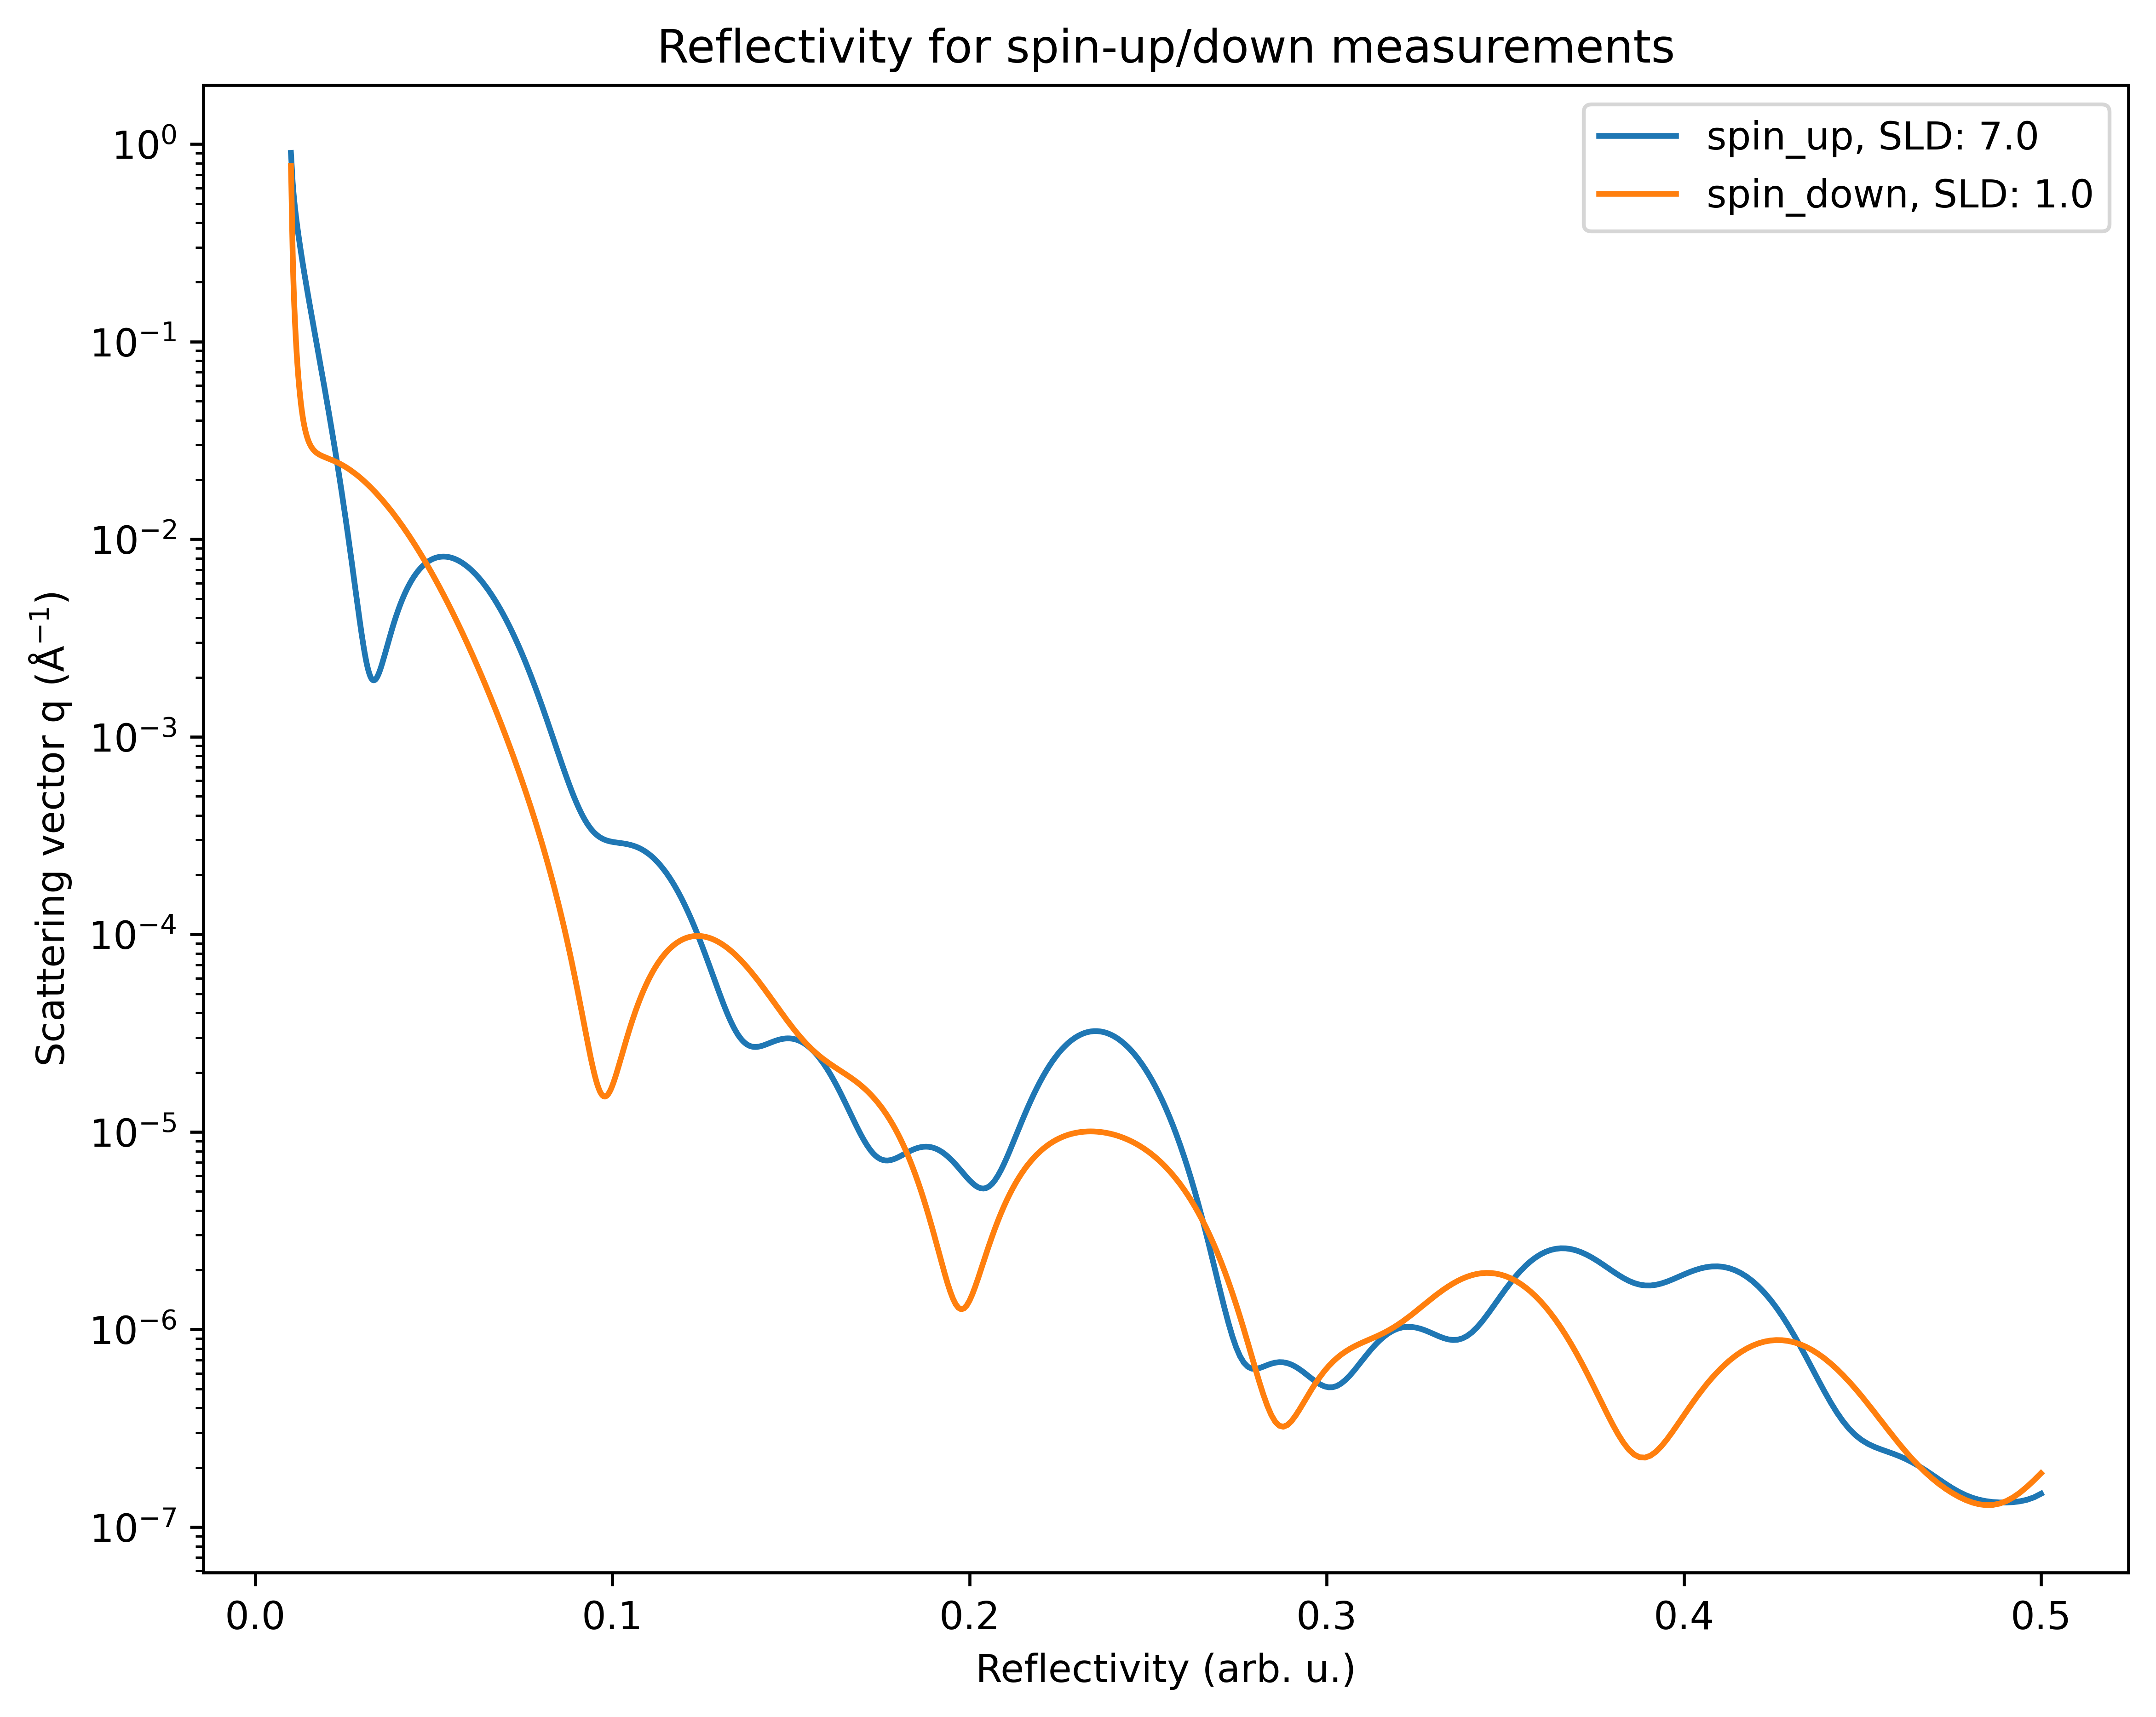

In [3]:


structures = sample.get_spin_structures()
q = np.geomspace(0.01, 0.5, 1000)
#structures.append(sample.structure)
for structure in structures:
    model = refnx.reflect.ReflectModel(structure)
    r = SimulateReflectivity(model).reflectivity(q)
    plt.plot(q, r, label=f"{structure[3].name}, SLD: {structure[3].sld.real.value}")
plt.yscale("log")
plt.legend()
plt.xlabel("Reflectivity (arb. u.)")
plt.ylabel("Scattering vector q (Å$^{-1}$)")
plt.title("Reflectivity for spin-up/down measurements")
plt.show()    

